In [1]:
import os
from os.path import dirname
from keras.models import load_model
from PIL import Image
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
classes=['circle','line','rectangle','triangle']

def get_script_dir():
    if '_dh' in globals():
        current_folder = globals()['_dh'][0]
    else:
        script_path=__file__
        current_folder=dirname(script_path)
    return current_folder

def get_model_dir():
    script_dir = get_script_dir()
    model_dir = os.path.join(script_dir,'..','data','model')
    return os.path.normpath(model_dir)


def get_image_dir(image_type):
    script_dir = get_script_dir()
    image_dir = os.path.join(script_dir,'..','data','images',image_type)
    return os.path.normpath(image_dir)


def load_trained_model():
    model_file=os.path.join(get_model_dir(),'trained_model_v3_epoch_39-acc_0.99.h5')
    return load_model(model_file)


def get_image(image_set,image_class,image_index):
    image_dir=get_image_dir(image_set)
    image_path=os.path.join(image_dir,image_class,image_class+'_'+str(image_index)+'.png')
    img=img = Image.open(image_path)
    return img


In [23]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    #fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.set_size_inches(5,5)
plt.show()

In [12]:
model = load_trained_model()

In [13]:
def get_text_X_for_class(img_class,image_dim):
    image_dir = get_image_dir('validate')
    image_dir = os.path.join(image_dir, img_class)
    #print('Scanning :: '+image_dir)
    pathlist = Path(image_dir).glob('*.png')
    img_arr_list = []
    for path in pathlist:
        filepath_str=str(path)
        #print('Loading :: '+filepath_str)
        img = Image.open(path)
        img = img.resize((image_dim,image_dim), Image.LANCZOS)
        arr = np.array(img)
        img_arr_list.append(arr)
    return np.array(img_arr_list)


In [14]:
def plot_wrong_results_for_class(image_class,image_class_index,image_dim=100, max_image_count=20):
    test_X=get_text_X_for_class(image_class,100)
    test_Y=model.predict_classes(test_X)
    incorrect_images=[]
    incorrect_image_ids=[]
    for idx, val in enumerate(test_Y):
        if val != image_class_index:
            #print("Wrong class %d for index %d." % (val, idx))
            img = get_image('validate',image_class,idx+1) 
            img = img.resize((image_dim,image_dim), Image.LANCZOS)
            arr = np.array(img)
            incorrect_images.append(arr)
            incorrect_image_ids.append(image_class+'_'+str(idx+1)+'.png')
            if len(incorrect_images)==max_image_count:
                print('Error cound exceed max, skipping rest of images')
                break
    show_images(incorrect_images, cols = 3, titles = incorrect_image_ids)

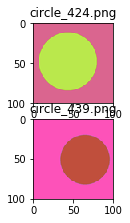

In [24]:
plot_wrong_results_for_class('circle',0)

Error cound exceed max, skipping rest of images


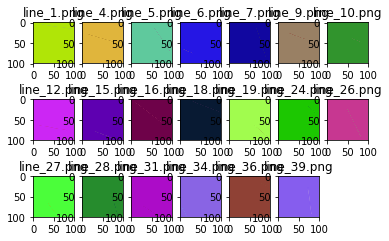

In [16]:
plot_wrong_results_for_class('line',1)

In [9]:
plot_wrong_results_for_class('rectangle',2)

<Figure size 0x0 with 0 Axes>

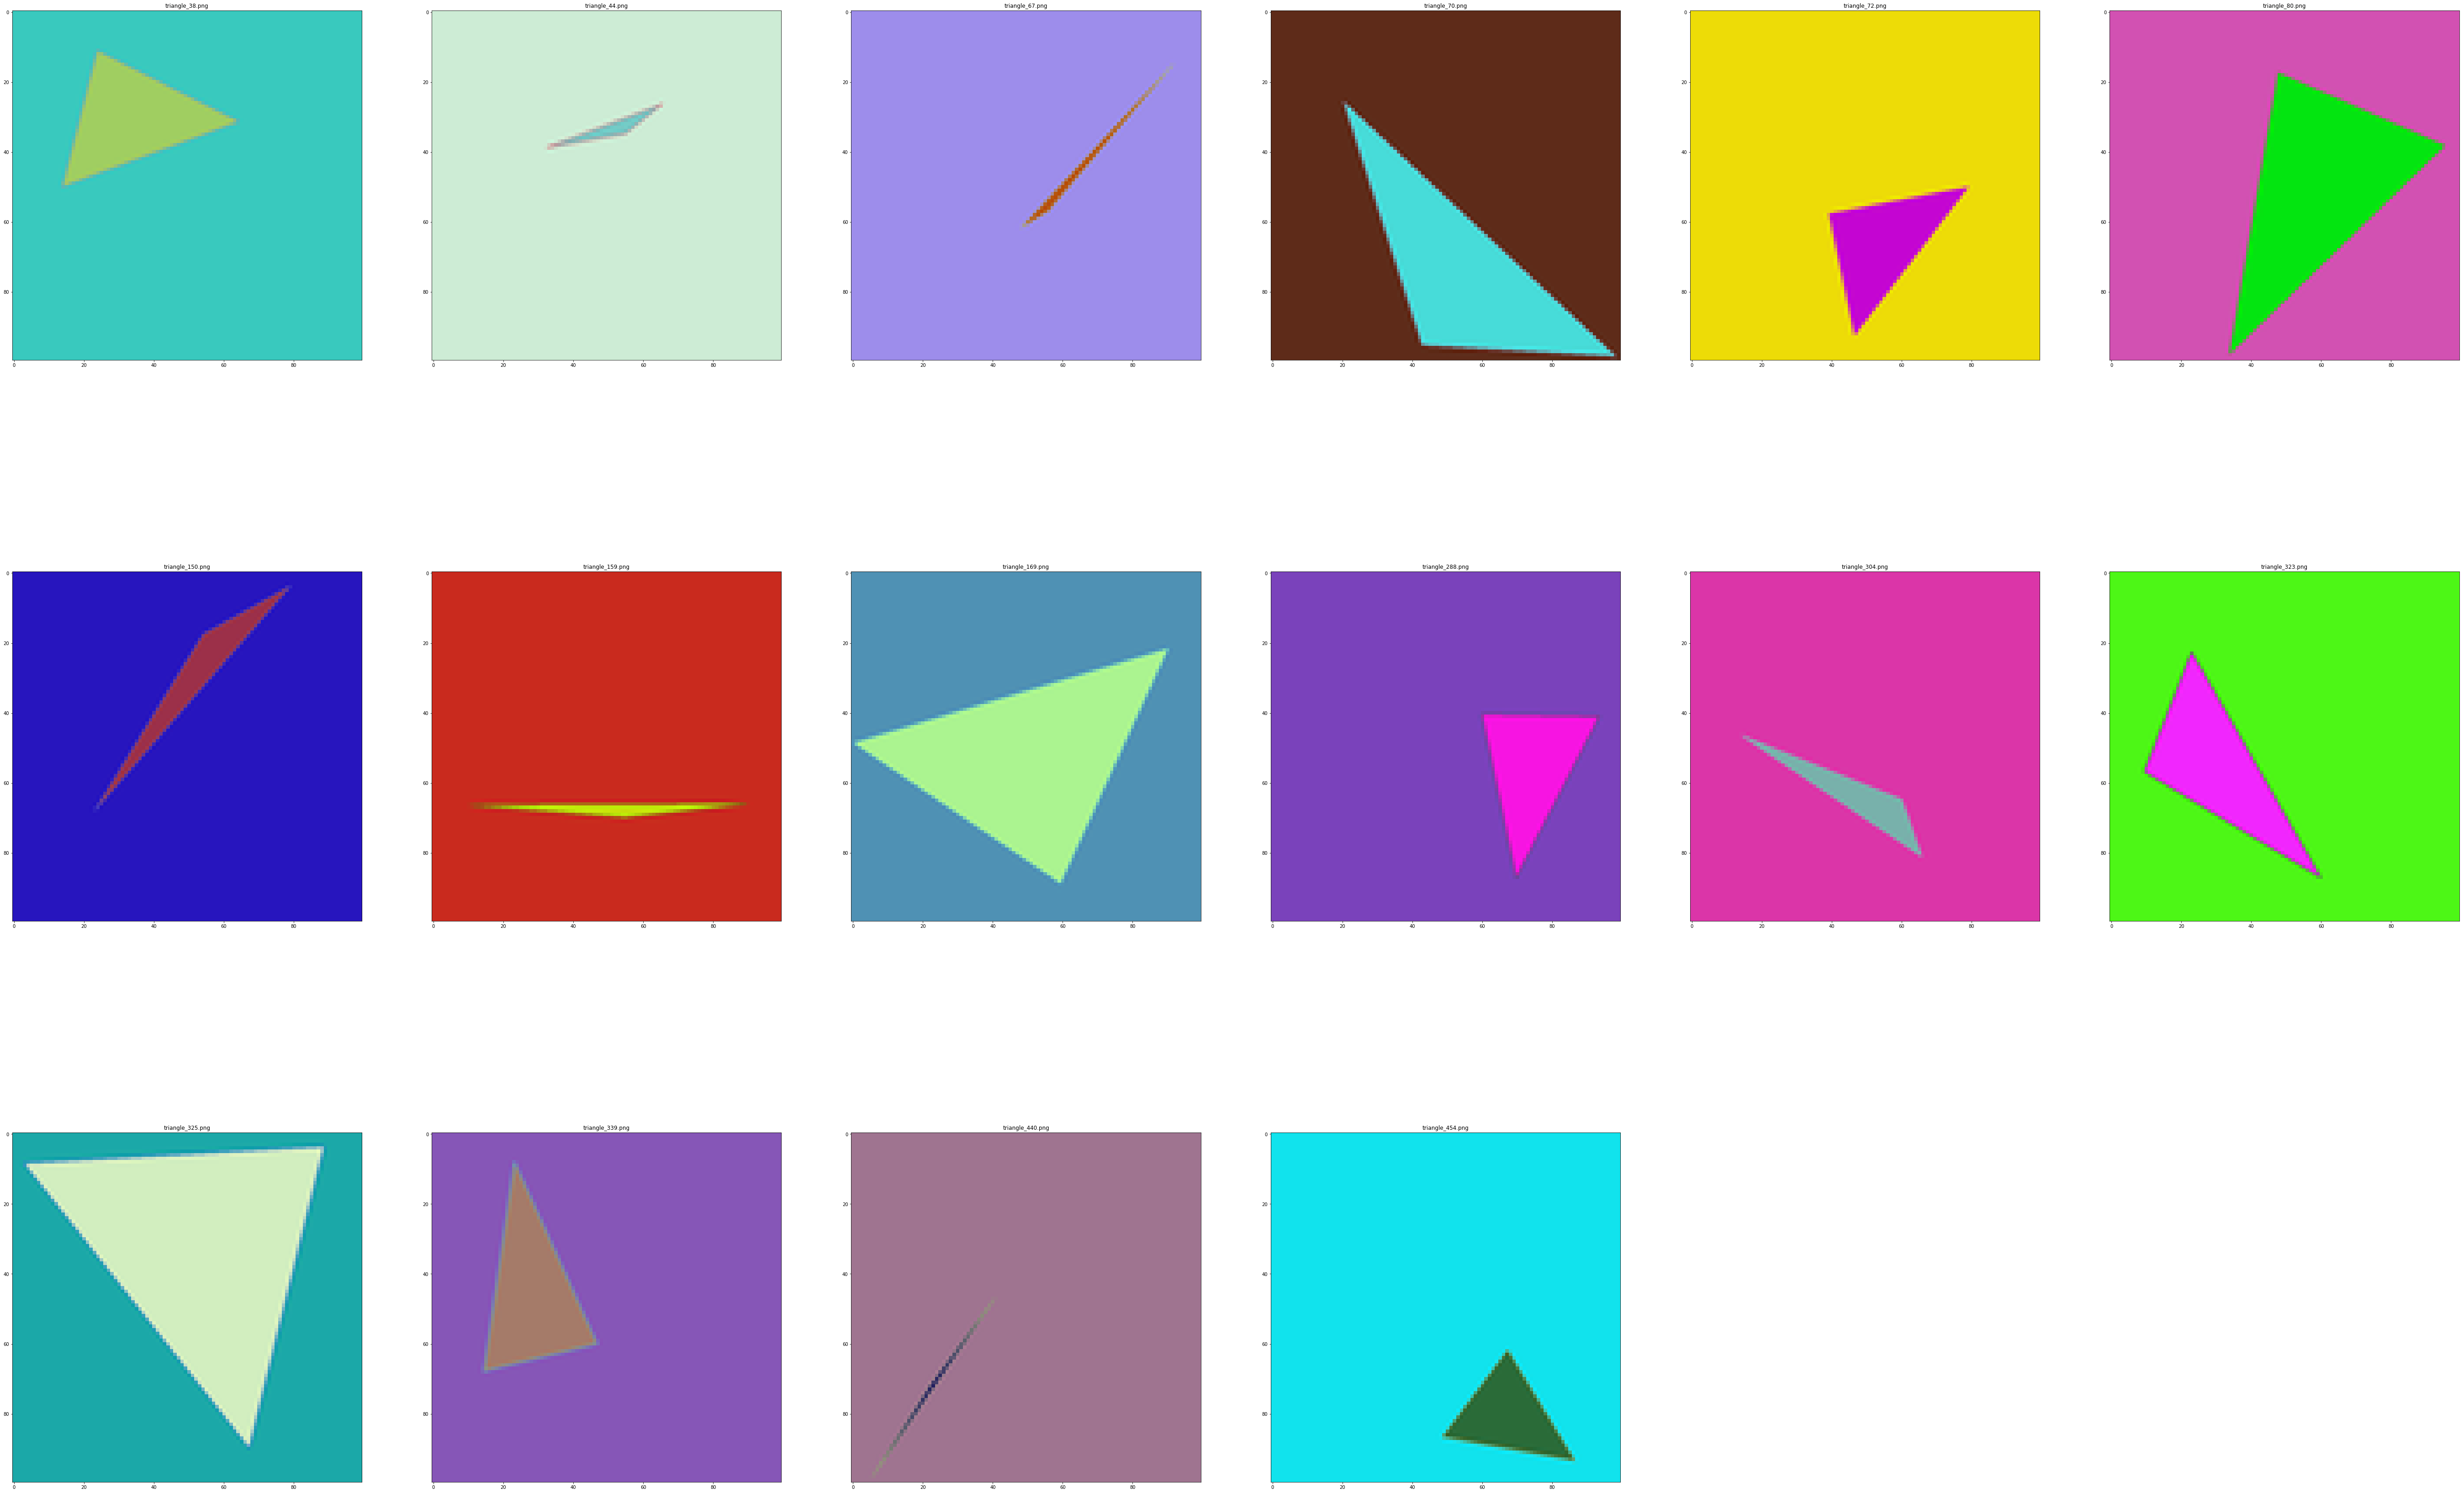

In [10]:
plot_wrong_results_for_class('triangle',3)